Test to use reinforcement learning to predict the needed inventory

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def reinforcement_learning_fit():
    price = 100
    cost = 80
    r0 = 0 #Initial inventory
    mean_week_demand = 15
    std_week_demand = 2
    mean_weekend_demand = 18
    std_weekend_demand = 3

    
    theta_max = np.arange(0, 100, 10)
    
    avg_profit_by_theta = {}
    for theta in theta_max:

        total_contributions = []
        for tests in np.arange(100):
            rt = r0
            
            daily_contributions = []
            for i in range(1, 30): #Running the simulation for 30 days
                day_of_week = (i - 1) % 7
                xt = theta - rt

                if day_of_week >= 5: #Weekend
                    demand = round(np.random.normal(mean_weekend_demand, std_weekend_demand))
                else: #Weekday
                    demand = round(np.random.normal(mean_week_demand, std_week_demand))

                rt_1 = max(0, rt + xt - demand)
                rt = rt_1
                contribution = price*min(rt + xt, demand) -(cost*xt)
                daily_contributions.append(contribution)

            total_contribution = np.sum(daily_contributions)
            total_contributions.append(total_contribution)
            
        avg_profit_by_theta[f'theta_{theta}'] = float(np.mean(total_contributions))

    return avg_profit_by_theta       

In [12]:
results = reinforcement_learning_fit()

In [13]:
results

{'theta_0': 0.0,
 'theta_10': 5787.2,
 'theta_20': 6941.0,
 'theta_30': 7789.8,
 'theta_40': 7140.4,
 'theta_50': 6354.2,
 'theta_60': 5548.8,
 'theta_70': 4785.6,
 'theta_80': 3945.8,
 'theta_90': 3153.6}

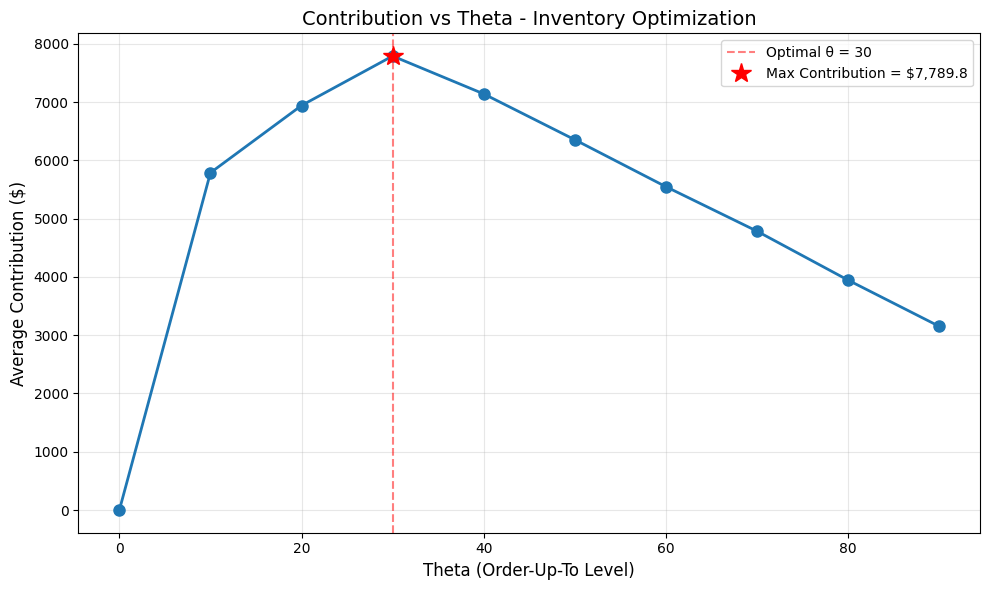

Optimal Theta: 30
Maximum Contribution: $7,789.80


In [15]:
theta_values = [int(key.split('_')[1]) for key in results.keys()]
contributions = list(results.values())

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(theta_values, contributions, marker='o', linewidth=2, markersize=8)
plt.xlabel('Theta (Order-Up-To Level)', fontsize=12)
plt.ylabel('Average Contribution ($)', fontsize=12)
plt.title('Contribution vs Theta - Inventory Optimization', fontsize=14)
plt.grid(True, alpha=0.3)

# Mark the optimal theta
optimal_theta = theta_values[contributions.index(max(contributions))]
optimal_contribution = max(contributions)
plt.axvline(x=optimal_theta, color='red', linestyle='--', alpha=0.5, label=f'Optimal θ = {optimal_theta}')
plt.plot(optimal_theta, optimal_contribution, 'r*', markersize=15, label=f'Max Contribution = ${optimal_contribution:,.1f}')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Optimal Theta: {optimal_theta}")
print(f"Maximum Contribution: ${optimal_contribution:,.2f}")